## Importing necesary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Loading CIFAR10 data into training and testing

In [3]:
data = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = data.load_data()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

## Exploring the data

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train.shape


(50000, 1)

In [7]:
X_train.shape #in this 50,000 data points are available for training, 

(50000, 32, 32, 3)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train[0]

array([6], dtype=uint8)

In [4]:
np.unique(y_train)  #0: airplane; 1: automobile; 2: bird; 3: cat; 4: deer; 5: dog; 6: frog; 7: horse; 8: ship; 9: truck

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
y_train = y_train.flatten() #1D array conversion
y_test = y_test.flatten()

In [16]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [18]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

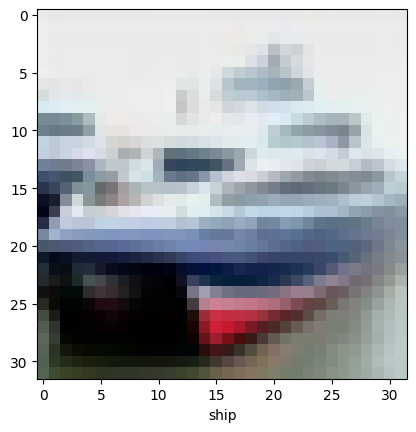

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(X_test[1]) 
plt.xlabel(class_names[y_test[1]])
plt.show() #image shown is highly blurred due to the pixels being 32x32 which is quite less for a proper image; even for youtube videos lowest quality
#being displayed is 144p(144 pixels in vertical)

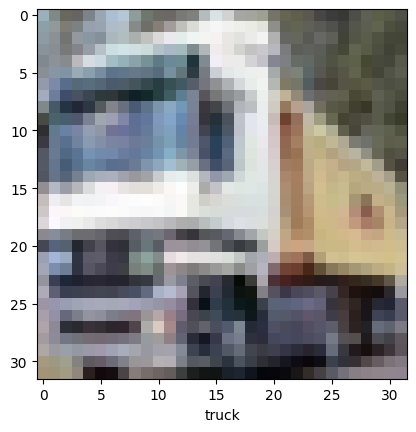

In [8]:
plt.imshow(X_train[1]) 
plt.xlabel(class_names[y_train[1]])
plt.show()

## CNN layerwise implementation

In [9]:
model = Sequential([
    #CNN steps
    Conv2D(32, (3,3), activation='relu',kernel_initializer='he_normal', input_shape = (32,32,3)), #32 kernels of size 3x3, inputs are images of 32x32 pixels with RGB values
    BatchNormalization(), #we apply normalization to outputs of each layer
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'),
    #From here repeat steps of ANN
    Flatten(),
    Dense(128, activation='relu'),#hidden layer
    Dropout(0.4),#Dropout rate of 0.4
    Dense(10, activation='softmax')#Output layer
])
model.summary()
opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])#(SCC is used as labels are provided as integers,instead of one-hot rep in which we can use CC)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) #early stopping to stop the model from learning when val_loss 
#becomes higher


#Max pooling, flattening has no param as they perform downsampling operations
#As we can see below, conv2d = convolutional layers
#MaxPooling2D = pooling layer with aggregation function
#30x30 output feature map with 32 kernels (32x32 input images, got reduced by 2 dimensions when kernels applied during convolution)
#Pooling reduces dimensions by half(saves memory)

C:\Users\nv\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,194 (1.36 MB)

 Trainable params: 357,002 (1.36 MB)

 Non-trainable params: 192 (768.00 B)

## Fitting

In [10]:
fitting = model.fit(X_train, y_train, epochs= 10, batch_size=500, validation_data=(X_test, y_test),verbose = 1) #verbose=0:nothing shown; default: verbose=1:animated progress bar; verbose=2: will
#just mention the number of epochs like this

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 278ms/step - accuracy: 0.2493 - loss: 2.2447 - val_accuracy: 0.4097 - val_loss: 1.6467
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.4791 - loss: 1.4402 - val_accuracy: 0.4821 - val_loss: 1.4244
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.5745 - loss: 1.1992 - val_accuracy: 0.5438 - val_loss: 1.2776
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.6318 - loss: 1.0463 - val_accuracy: 0.6241 - val_loss: 1.0605
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.6758 - loss: 0.9320 - val_accuracy: 0.6451 - val_loss: 0.9918
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.7056 - loss: 0.8411 - val_accuracy: 0.6723 - val_loss: 0.9322
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 297ms/step - accuracy: 0.7327 - loss: 0.7664 - val_accuracy: 0.6817 - val_loss: 0.9116
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 297ms/step - accuracy: 0.7567 - loss: 0

In [11]:
model.evaluate(X_test,y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6999 - loss: 0.8993


[0.8847657442092896, 0.7067999839782715]

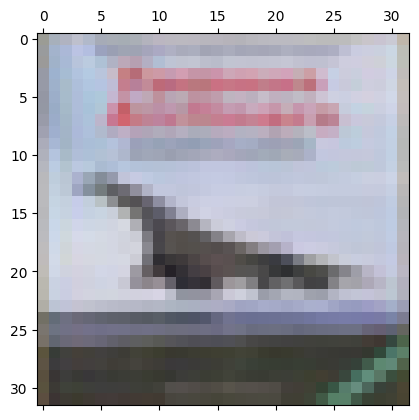

In [12]:
plt.matshow(X_test[3])

In [13]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argmax(y_pred[0])
print(index)
class_names[index]

3


'cat'

## Checking

In [ ]:
def Checking():
    user_input = int(input("Please enter a number between 0-9999, basically you are entering an image as prompt: "))
    plt.matshow(X_test[user_input])
    index = np.argmax(y_pred[user_input])
    print("And the predicted image is that of a "+class_names[index])
    print("Well, the actual image was of a "+class_names[y_test[user_input]])
    if(class_names[index] == class_names[y_test[user_input]]):
      print("Got it right :)")
    else:
      print("Never mind :(") #Due to the low accuracy of the model, we couldn't predict it correctly
    plt.show()
Checking()

Please enter a number between 0-9999, basically you are entering an image as prompt:  87


And the predicted image is that of a ship
Well, the actual image was of a horse
Never mind :(


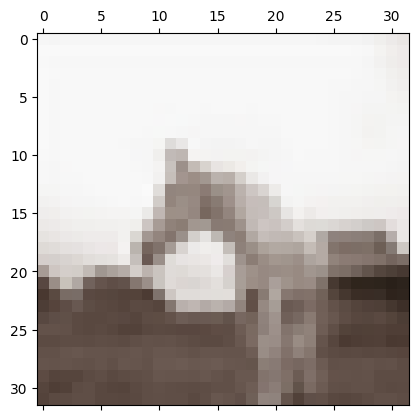

In [18]:
Checking() #Incorrect identification due to low accuracy